In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from itertools import combinations

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### **1. Zachary's Karate Club**

Zachary, W. W. (1977), ‘An Information Flow Model for Conflict and Fission in Small Groups’, Journal of Anthropological Research 33, 452-473.

**Description** 

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club.

In [ ]:
K = nx.karate_club_graph()

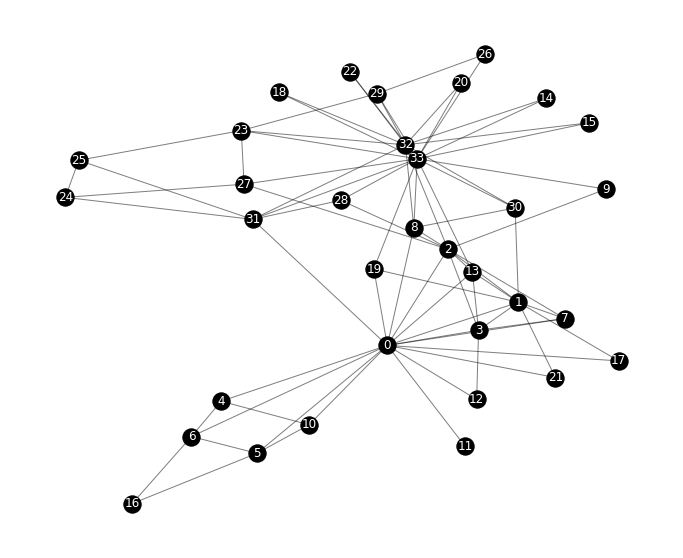

In [ ]:
pos = nx.fruchterman_reingold_layout(K);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(K, pos, node_size=300, node_color='black');
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color='white');
plt.show();

### 1.a. Network Structure Properties

Nodes:  34
Edges:  78
Average degree:  4.588235294117647
Minimum degree:  1
Maximum degree:  17


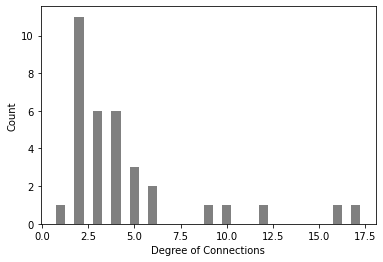

Average Network Clustering:  0.5706384782076823
Average Path length:  2.408199643493761
Network Diameter:  5


In [ ]:
network_name = K

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
#print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

In [ ]:
def list_neighbors(network_name, deg_list):
  neighbors_dict = {}
  for node in deg_list:
    neighbors_dict[node[0]] = list(network_name.neighbors(node[0]))
  return neighbors_dict

In [ ]:
neighbors_dict = list_neighbors(K, deg_list)

In [ ]:
neighbors_dict

{0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
 1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
 2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
 3: [0, 1, 2, 7, 12, 13],
 4: [0, 6, 10],
 5: [0, 6, 10, 16],
 6: [0, 4, 5, 16],
 7: [0, 1, 2, 3],
 8: [0, 2, 30, 32, 33],
 9: [2, 33],
 10: [0, 4, 5],
 11: [0],
 12: [0, 3],
 13: [0, 1, 2, 3, 33],
 14: [32, 33],
 15: [32, 33],
 16: [5, 6],
 17: [0, 1],
 18: [32, 33],
 19: [0, 1, 33],
 20: [32, 33],
 21: [0, 1],
 22: [32, 33],
 23: [25, 27, 29, 32, 33],
 24: [25, 27, 31],
 25: [23, 24, 31],
 26: [29, 33],
 27: [2, 23, 24, 33],
 28: [2, 31, 33],
 29: [23, 26, 32, 33],
 30: [1, 8, 32, 33],
 31: [0, 24, 25, 28, 32, 33],
 32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
 33: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]}

In [ ]:
## Get the Union-Intersection of the "hubs"
hubs_list = [0,1,2,32,33]
pairwise_combinations = [(a, b) for idx, a in enumerate(hubs_list) for b in hubs_list[idx + 1:]]

for pair in pairwise_combinations:
  print(pair)
  print(set(neighbors_dict[pair[0]]).intersection(set(neighbors_dict[pair[1]])))

(0, 1)
{2, 3, 7, 13, 17, 19, 21}
(0, 2)
{1, 3, 7, 8, 13}
(0, 32)
{8, 2, 31}
(0, 33)
{8, 19, 13, 31}
(1, 2)
{0, 3, 13, 7}
(1, 32)
{2, 30}
(1, 33)
{19, 13, 30}
(2, 32)
{8}
(2, 33)
{32, 8, 9, 13, 27, 28}
(32, 33)
{8, 14, 15, 18, 20, 22, 23, 29, 30, 31}


In [ ]:
clustering_dict

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

### 1.b. Network Insights 


The Karate club has 34 members and there are a total of 78 links among them. 
On average, each member has a relationship with 4-5 members of the group. The minimum number of links observed is 1, while the maximum is 17. The member with the minimum number of links is Node 11, who could be the peripheral specialist of the team or a newly onboarded member to the club. Meanwhile, Node 33 had the highest number of links. This member is central to the network, in terms of degree centrality, and may be holding the position of a club officer or a senior member. 

Based on the probability distribution, the modal number of connections is 2, suggesting that most members have fewer connections than the group's average. It would be worthwhile to investigate the performance of these individuals as their learnings or skill development may be limited by the interactions they have with other members. Other factors such as team disputes or scheduling conflicts could be explored to understand the reason behind the low number of connections to improve team dynamics. The probability distribution also shows the presence of hubs, as there are 5 members who have more than 7.5 connections - Nodes 0, 1, 2, 32, and 33. Understanding the links between these hubs and the information that they propagate could also help explain the behavior of the team. For example, Nodes 32 and 33 are friends, with 10 connections in common, which makes the two of them influential for at least 1/3 of the club. Their clustering coefficients are 0.196 and 0.11, respectively, suggesting that their neighbors are not related to each other and could depend on them for information. This can be detrimental if these two nodes spread information that maligns another member of the team. 

The average clustering cefficient is 0.57, which means that the Karate club is not fully connected. The average path length is 2.41 while the network diameter is 5. In terms of efficiency in the flow of information, this means that on average, it takes two members to pass information between any two unrelated members together. Meanwhile, the longest path to pass information across the group would be five members.



### **2. Davis Southern Women Social Network**

Vladimir Batagelj and Andrej Mrvar (2006): Pajek datasets
http://vlado.fmf.uni-lj.si/pub/networks/data/. 

**Description**

This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

In [ ]:
DS = nx.davis_southern_women_graph()

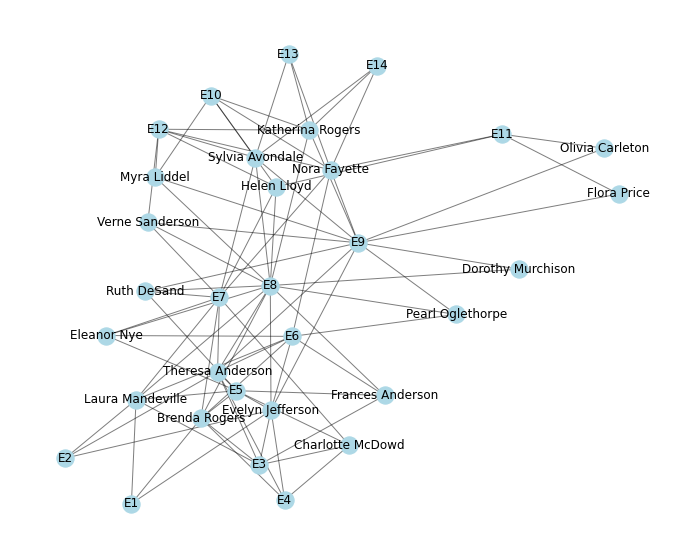

In [ ]:
pos = nx.fruchterman_reingold_layout(DS);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(DS, pos, node_size=300, node_color='lightblue');
nx.draw_networkx_edges(DS, pos, alpha=0.5);
nx.draw_networkx_labels(DS, pos, font_color='black');
plt.show();

### 2.a. Network Structure Properties

Nodes:  32
Edges:  89
Average degree:  5.5625
Minimum degree:  2
Maximum degree:  14
Average degree:  4.588235294117647


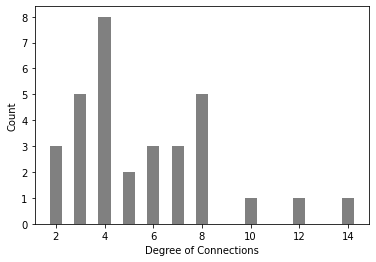

Average Network Clustering:  0.0
Average Path Length:  2.306451612903226
Network Diameter:  4


In [ ]:
network_name = DS

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
#k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path Length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

In [ ]:
neighbors_dict = list_neighbors(DS, deg_list)

In [ ]:
neighbors_dict

{'Brenda Rogers': ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
 'Charlotte McDowd': ['E3', 'E4', 'E5', 'E7'],
 'Dorothy Murchison': ['E8', 'E9'],
 'E1': ['Evelyn Jefferson', 'Laura Mandeville', 'Brenda Rogers'],
 'E10': ['Myra Liddel',
  'Katherina Rogers',
  'Sylvia Avondale',
  'Nora Fayette',
  'Helen Lloyd'],
 'E11': ['Nora Fayette', 'Helen Lloyd', 'Olivia Carleton', 'Flora Price'],
 'E12': ['Verne Sanderson',
  'Myra Liddel',
  'Katherina Rogers',
  'Sylvia Avondale',
  'Nora Fayette',
  'Helen Lloyd'],
 'E13': ['Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette'],
 'E14': ['Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette'],
 'E2': ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson'],
 'E3': ['Evelyn Jefferson',
  'Laura Mandeville',
  'Theresa Anderson',
  'Brenda Rogers',
  'Charlotte McDowd',
  'Frances Anderson'],
 'E4': ['Evelyn Jefferson',
  'Theresa Anderson',
  'Brenda Rogers',
  'Charlotte McDowd'],
 'E5': ['Evelyn Jefferson',
  'Laura Mandeville',
  'Theresa

### 2.b. Network Insights

The Davis Southern Women Social network consists of 32 nodes, with 89 connections. Each node has an average of 5-6 connections. The minimum number of connections is 2 and the maximum is 4. 

The probability distribution suggests the presence of hubs as there are three nodes with a degree of more than 10. The modal number of links in the network is given by 4. 

The network clustering is 0, which suggests that the neighboring nodes of all node in the network are isolated from each other. Inspecting the "neighbors_dict" above shows that women are linked to E_i nodes, while the E_i nodes only had links to women's names. No connections exist among the E_i's and the women's names. 

Given that the network is comprised of two types of nodes, women's names and the events (E_i) they've attended, the network could be projected in two ways - a.) projection among the women nodes
b.) projection among the events 

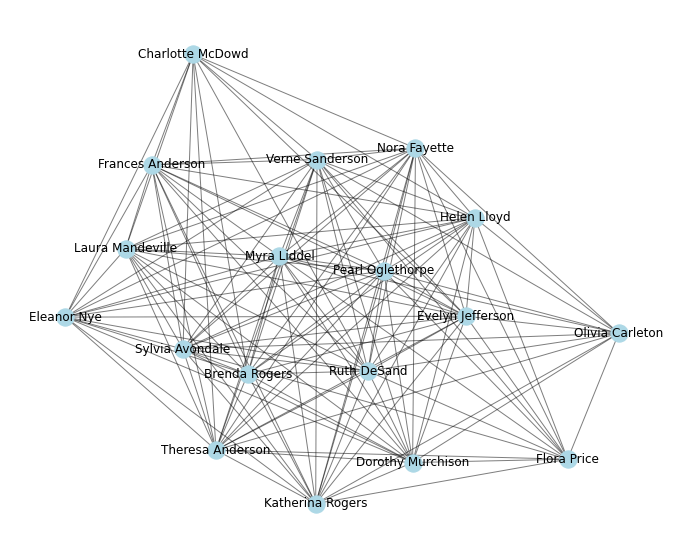

In [ ]:
# A. Projection of the Women nodes
women_names = [node for node in list(DS.nodes()) if len(node) > 3]
women_network = nx.projected_graph(DS, women_names, multigraph = False)

pos = nx.fruchterman_reingold_layout(women_network);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(women_network, pos, node_size=300, node_color='lightblue');
nx.draw_networkx_edges(women_network, pos, alpha=0.5);
nx.draw_networkx_labels(women_network, pos, font_color='black');
plt.show();

Nodes:  18
Edges:  139
Average degree:  15.444444444444445
Minimum degree:  11
Maximum degree:  17


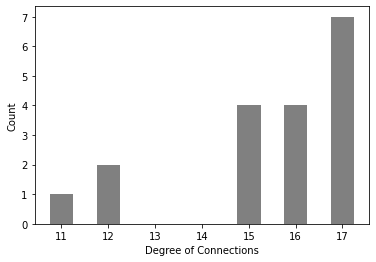

Average Network Clustering:  0.9366868969810146
Average Path Length:  1.091503267973856
Network Diameter:  2


In [ ]:
network_name = women_network

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
#k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
#print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path Length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

In [ ]:
deg_list

[('Evelyn Jefferson', 17),
 ('Laura Mandeville', 15),
 ('Theresa Anderson', 17),
 ('Brenda Rogers', 15),
 ('Charlotte McDowd', 11),
 ('Frances Anderson', 15),
 ('Eleanor Nye', 15),
 ('Pearl Oglethorpe', 16),
 ('Ruth DeSand', 17),
 ('Verne Sanderson', 17),
 ('Myra Liddel', 16),
 ('Katherina Rogers', 16),
 ('Sylvia Avondale', 17),
 ('Nora Fayette', 17),
 ('Helen Lloyd', 17),
 ('Dorothy Murchison', 16),
 ('Olivia Carleton', 12),
 ('Flora Price', 12)]

### **2.b.1. Network Insights - DS Women Network**


There are a total of 18 women in the Davis Social network, who have a total of 139 connections. On average, a woman has 16 connections in the network. The minimum number of connections is 11, while the maximum is 17. Here, we define that a connection exists if two women attended the same event. Theresa, Ruth, Verne, Sylvia, Nora, Evelyn and Helen have the highest links, while Charlotte had the lowest links. Being proactive as inviting Charlotte to more events could be a way to increase her relationships with the rest of the group.

The network clustering is 0.94. Since this is close to 1, it could be inferred that the Davis women network is well-connected as each member knows majority of the group members. This could also suggest the effectiveness of the events as an opportunity for women to network with each other. The average path length is 1.1, which suggests efficiency in information flow. This means that on average, it takes 1 person to transmit information between two unrelated members. The network diameter is 2, and this means that the maximum number of intermediaries to facilitate information flow is 2. 

In [ ]:
# B. Projection of the Event Nodes
events = set(list(DS.nodes())) - set(women_names)
events_network = nx.projected_graph(DS, events, multigraph = False)

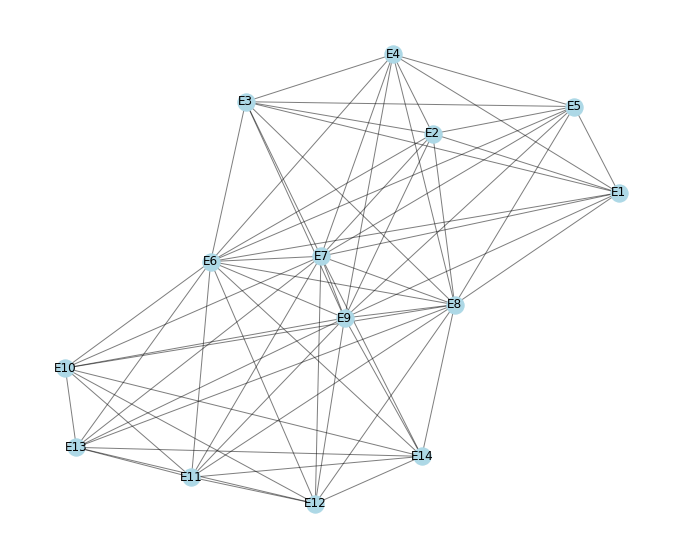

In [ ]:
pos = nx.spring_layout(events_network);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(events_network, pos, node_size=300, node_color='lightblue');
nx.draw_networkx_edges(events_network, pos, alpha=0.5);
nx.draw_networkx_labels(events_network, pos, font_color='black');
plt.show();

Nodes:  14
Edges:  66
Average degree:  9.428571428571429
Minimum degree:  8
Maximum degree:  13


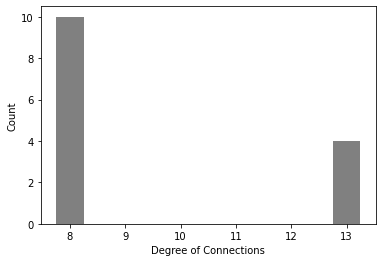

Average Network Clustering:  0.9084249084249084
Average Path Length:  1.2747252747252746
Network Diameter:  2


In [ ]:
network_name = events_network

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
#k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
#print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path Length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

### **2.b.1. Network Insights - DS Event Network**


There are 14 distinct events in the DS event network, having 66 edges. In this projection, a connection is present if two events have at least one attendee in common.

The probability distribution shows that there are only 2 distint values for the degree of connections -  8 and 13. The modal number of connections is 8, which means that most events are related as they are similar to 8 events, who have at least 1 similar attendee. Meanwhile, there are 4 events which are related to 13 events. The clustering coefficient of the entire network is 0.91, which implies a high degree of connectedness among the events in terms of their participants. However, this could also imply that events may be too similar with each other. 



### **3. Florentine Families**

- Breiger R. and Pattison P. (1986). Cumulated social roles: The duality of persons and their algebras. Social Networks, 8, 215-256.
- Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500. Paper delivered to the Social Science History Association. 

**Description** 

This is a data set of marriage and business ties among Renaissance Florentine families.

In [ ]:
florentine = nx.florentine_families_graph() 

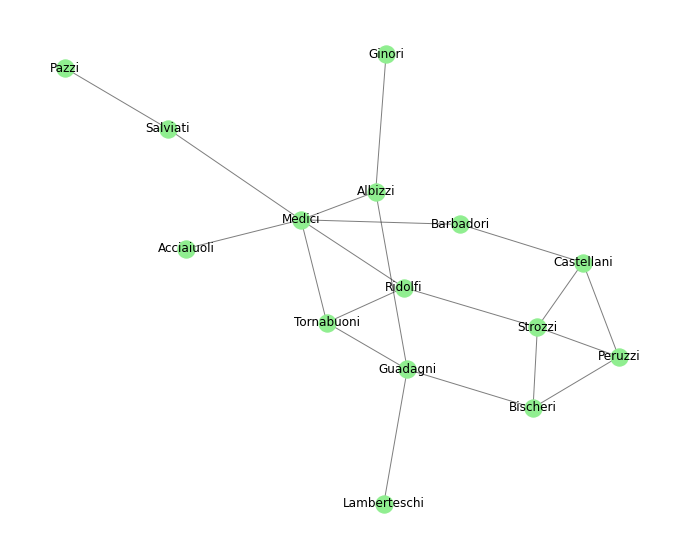

In [ ]:
pos = nx.fruchterman_reingold_layout(florentine);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(florentine, pos, node_size=300, node_color='lightgreen');
nx.draw_networkx_edges(florentine, pos, alpha=0.500);
nx.draw_networkx_labels(florentine, pos, font_color='black');
plt.show();


#### 3.a. Network Structure Properties

Nodes:  15
Edges:  20
Average degree:  2.6666666666666665
Minimum degree:  1
Maximum degree:  6
Average degree:  2.6666666666666665


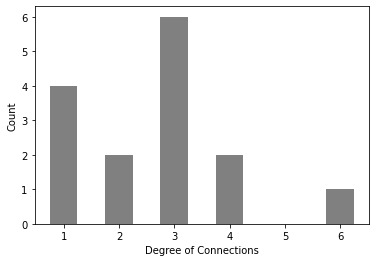

Average Network Clustering:  0.16
Average Path Length:  2.4857142857142858
Network Diameter:  5


In [ ]:
network_name = florentine

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path Length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

In [ ]:
deg_list

[('Acciaiuoli', 1),
 ('Medici', 6),
 ('Castellani', 3),
 ('Peruzzi', 3),
 ('Strozzi', 4),
 ('Barbadori', 2),
 ('Ridolfi', 3),
 ('Tornabuoni', 3),
 ('Albizzi', 3),
 ('Salviati', 2),
 ('Pazzi', 1),
 ('Bischeri', 3),
 ('Guadagni', 4),
 ('Ginori', 1),
 ('Lamberteschi', 1)]

In [ ]:
path_length_df = pd.DataFrame.from_dict(path_length)
path_length_df

,Acciaiuoli,Medici,Castellani,Peruzzi,Strozzi,Barbadori,Ridolfi,Tornabuoni,Albizzi,Salviati,Pazzi,Bischeri,Guadagni,Ginori,Lamberteschi
Acciaiuoli,0,1,3,4,3,2,2,2,2,2,3,4,3,3,4
Medici,1,0,2,3,2,1,1,1,1,1,2,3,2,2,3
Albizzi,2,1,3,3,3,2,2,2,0,2,3,2,1,1,2
Ridolfi,2,1,2,2,1,2,0,1,2,2,3,2,2,3,3
Tornabuoni,2,1,3,3,2,2,1,0,2,2,3,2,1,3,2
Salviati,2,1,3,4,3,2,2,2,2,0,1,4,3,3,4
Barbadori,2,1,1,2,2,0,2,2,2,2,3,3,3,3,4
Strozzi,3,2,1,1,0,2,1,2,3,3,4,1,2,4,3
Guadagni,3,2,3,2,2,3,2,1,1,3,4,1,0,2,1
Castellani,3,2,0,1,1,1,2,3,3,3,4,2,3,4,4


In [ ]:
path_sum = dict(pd.DataFrame.from_dict(path_length).sum())
path_max = dict(pd.DataFrame.from_dict(path_length).max())

In [ ]:
## Per Node Statistics - Number of Degrees, Sum of Shortest Paths, Max Shortest Path, Clustering Coefficient

nodes_dict = {}

for node in florentine.nodes():
  nodes_dict[node] = {'Degree': deg_dict[node],
                      'Sum of Shortest Paths': path_sum[node],
                      'Max Shortest Path': path_max[node],
                      'Clustering Coefficient': clustering_dict[node]
                      }
              
node_df = pd.DataFrame.from_dict(nodes_dict).transpose()

In [ ]:
node_df.sort_values('Clustering Coefficient')

,Degree,Sum of Shortest Paths,Max Shortest Path,Clustering Coefficient
Acciaiuoli,1.0,38.0,4.0,0.000000
Barbadori,2.0,32.0,4.0,0.000000
Albizzi,3.0,29.0,3.0,0.000000
Salviati,2.0,36.0,4.0,0.000000
Pazzi,1.0,49.0,5.0,0.000000
Guadagni,4.0,30.0,4.0,0.000000
Ginori,1.0,42.0,4.0,0.000000
Lamberteschi,1.0,43.0,5.0,0.000000
Medici,6.0,25.0,3.0,0.066667
Castellani,3.0,36.0,4.0,0.333333


#### 3.b. Network Insights

The Florentine network is comprised of 15 families, having a total of 20 connections. The average number of connections that a family has is 2.66. From the degree distribution, the modal number of links is 3. The average path length in the network is 2.49, which means that it takes an average of 2 to 3 nodes to transmit information between two unrelated nodes. This takes at least 20% (3/15) of the total members, which may suggest inefficiency in information flow given the network size. The maximum shortest path between individuals is 5. This was observed between Pazzi and the following families:

*   Pazzi and Peruzzi
*   Pazzi and Lamberteschi
*   Pazzi and Bischerri

The clustering coefficient of the network is 0.16, suggesting that the neighbors of the nodes in the florentine network are not well connected. At the node-level, it could be observed that majority of the nodes had a clustering of 0. The Peruzzi family had the highest clustering coefficient of 0.66, which means that relative to the other nodes, tighter connection is observed among the families connected to the Peruzzi clan. 

The Medici family has the highest number of relationships, which is 6. It is central in the network in terms of degree centrality. Moreover, it also had the shortest path among the families. Its distance to any family ranges from 1 to 3. Its clustering coefficient is 0.067. This indicates a low degree of connections among its neighbors. 

Meanwhile, families such as Acciaiouli, Pazzi, Ginori, and Lamberteschi each had 1 connection, playing a peripheral role in the network. 





### **4. MSDS 2020 Hangout Network**


The MSDS 2020 Hangout Network was generated in class on 06 February 2020. The instruction given to the students was:

_"Who among your classmates do you most frequently hangout with [not necessarily for classwork] (choose 3 to 8)? Alternatively, who are those you enjoy hanging out with the most?"_

The dataset is anonymized.

---

_For MBA (2022) students, we'll work on this item in class since I expect that many of you have not yet written scripts to access files on your Google Drive. Further, many are still unfamiliar with reading a pickle file._

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Colab Notebooks/data/netsci_datasets/'

Mounted at /content/drive


In [ ]:
msds = pd.read_pickle(data_dir+'class-map.pkl')

In [ ]:
G_msds = nx.Graph(msds)

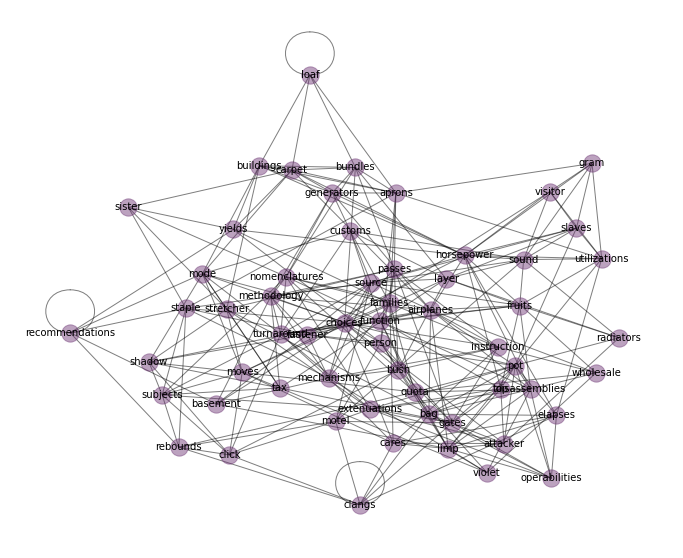

In [ ]:
# pos = nx.fruchterman_reingold_layout(G_msds);
pos = nx.spring_layout(G_msds);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(G_msds, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(G_msds, pos, alpha=0.500);
nx.draw_networkx_labels(G_msds, pos, font_color='black', 
                        font_size=10);
plt.show();

In [ ]:
G_msds.remove_edges_from(nx.selfloop_edges(G_msds)) #remove self-loops

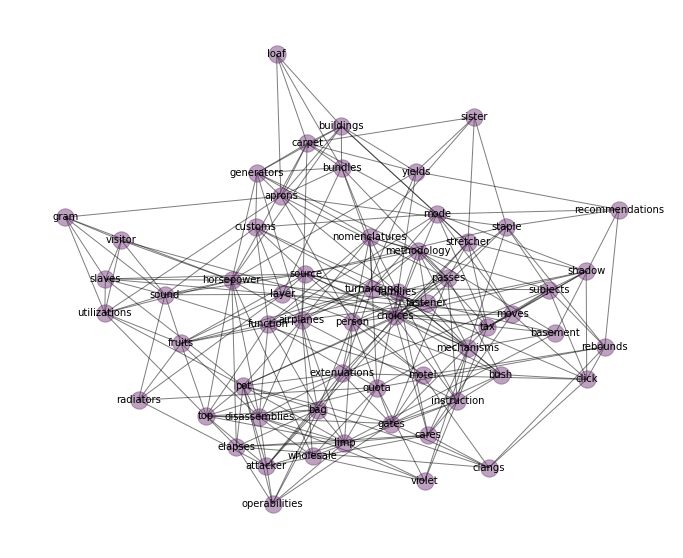

In [ ]:
pos = nx.fruchterman_reingold_layout(G_msds);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(G_msds, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(G_msds, pos, alpha=0.500);
nx.draw_networkx_labels(G_msds, pos, font_color='black', 
                        font_size=10);
plt.show();

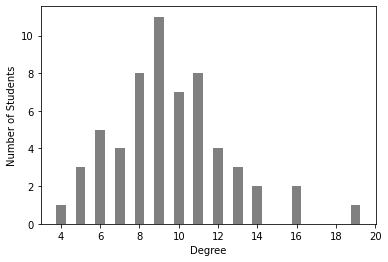

In [ ]:
deg = pd.Series([k for n,k in nx.degree(G_msds)])
labels, counts = np.unique(deg, return_counts=True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of Students')
plt.show()

### 4.a. Network Structure Properties

Nodes:  59
Edges:  282
Average degree:  9.559322033898304
Minimum degree:  4
Maximum degree:  19
Average degree:  9.559322033898304


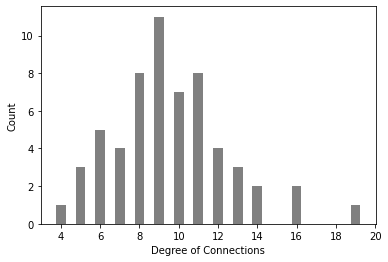

average_network_clustering:  0.34151264287303534
average path length:  2.081823495032145
network diameter:  4


In [ ]:
network_name = G_msds

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('average_network_clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('average path length: ', average_shortest_path_length(network_name))
print('network diameter: ', nx.diameter(network_name))

In [ ]:
path_length_df = pd.DataFrame.from_dict(path_length)
path_sum = dict(pd.DataFrame.from_dict(path_length).sum())
path_max = dict(pd.DataFrame.from_dict(path_length).max())

## Per Node Statistics - Number of Degrees, Sum of Shortest Paths, Max Shortest Path, Clustering Coefficient

nodes_dict = {}

for node in G_msds.nodes():
  nodes_dict[node] = {'Degree': deg_dict[node],
                      'Sum of Shortest Paths': path_sum[node],
                      'Max Shortest Path': path_max[node],
                      'Clustering Coefficient': clustering_dict[node]
                      }
              
node_df = pd.DataFrame.from_dict(nodes_dict).transpose()

In [ ]:
node_df.sort_values('Max Shortest Path')

,Degree,Sum of Shortest Paths,Max Shortest Path,Clustering Coefficient
choices,19.0,97.0,2.0,0.210526
methodology,11.0,115.0,3.0,0.363636
person,9.0,115.0,3.0,0.166667
yields,7.0,125.0,3.0,0.190476
staple,9.0,117.0,3.0,0.222222
layer,10.0,119.0,3.0,0.222222
utilizations,9.0,125.0,3.0,0.416667
mechanisms,12.0,114.0,3.0,0.363636
recommendations,5.0,139.0,3.0,0.100000
gram,6.0,138.0,3.0,0.733333


### 4.b. Network Insights

The MSDS network is comprised of 59 students with a total of 282 connections with each other. Each student in the MSDS class is friends with 9.55 students, on average. The minimum number of friends that a student has is 4, while the maximum is 19. The clustering coefficient of the network is 0.341. Since this is close to 0, suggesting a low degree of connection among the friends of each student. This could be related to the fact that students are assigned to learning teams which have little interactions between them. The shortest path is 2.08 while the netowrk diameter is 4. This implies that it takes an average of 2 students, and a maximum of 4 students to link any pair of unrelated students. This corresponds to 3-7% (2/59 and 4/59) of the network to pass the information to any student, suggesting efficiency in information flow, despite the low degree of clustering. 

The student with the most connections in the group is "Choices", having a total of 19 friends. It is followed by airplanes and horsepower, with 16 friends each. In contrast, "Loaf" has the lowest number of links, which is 4. Loaf is followed by Sisters, Recommendations, and Radiators, having 5 friends each. Interestingly, "Choices" who had the most friends also had the lowest max shortest path in the network which is 2, making it close to any student in the network. Meanwhile, "Loaf" who had the least connections also had a clustering coefficient of 1, indicating that all its friends are also related to each other. However, this could also mean that "Loaf" associates only with its friend group and does not socialize outside of it, explaining its low number of connections.

### MSDS 2022 LTS
Each term, MSDS students are assigned to new LTs. In their penultimate term, students get to choose their own LTs. 

In [ ]:
msds2022_LTs = nx.read_edgelist(data_dir+'MSDS2022.edges', delimiter=',')

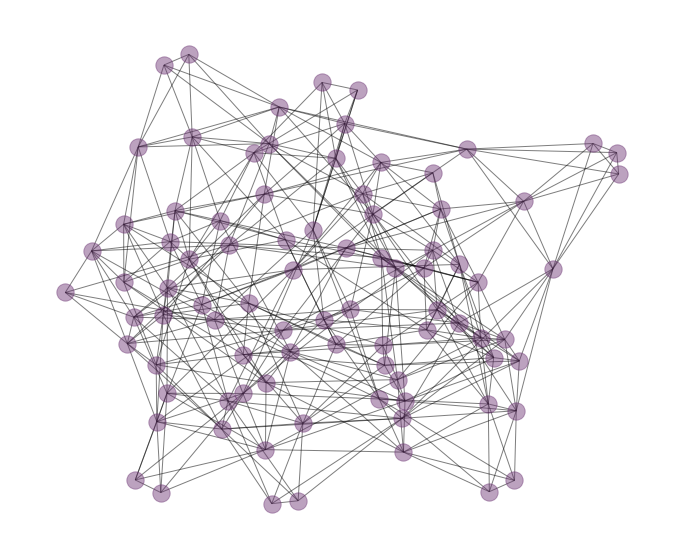

In [ ]:
pos = nx.fruchterman_reingold_layout(msds2022_LTs);
plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(msds2022_LTs, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(msds2022_LTs, pos, alpha=0.500);
# nx.draw_networkx_labels(msds2022_LTs, pos, font_color='black', 
#                         font_size=10);
plt.show();

## Class Structure Evolution

In [ ]:
msds2022_df = pd.read_csv(data_dir + 'MSDS2022_lts.csv')

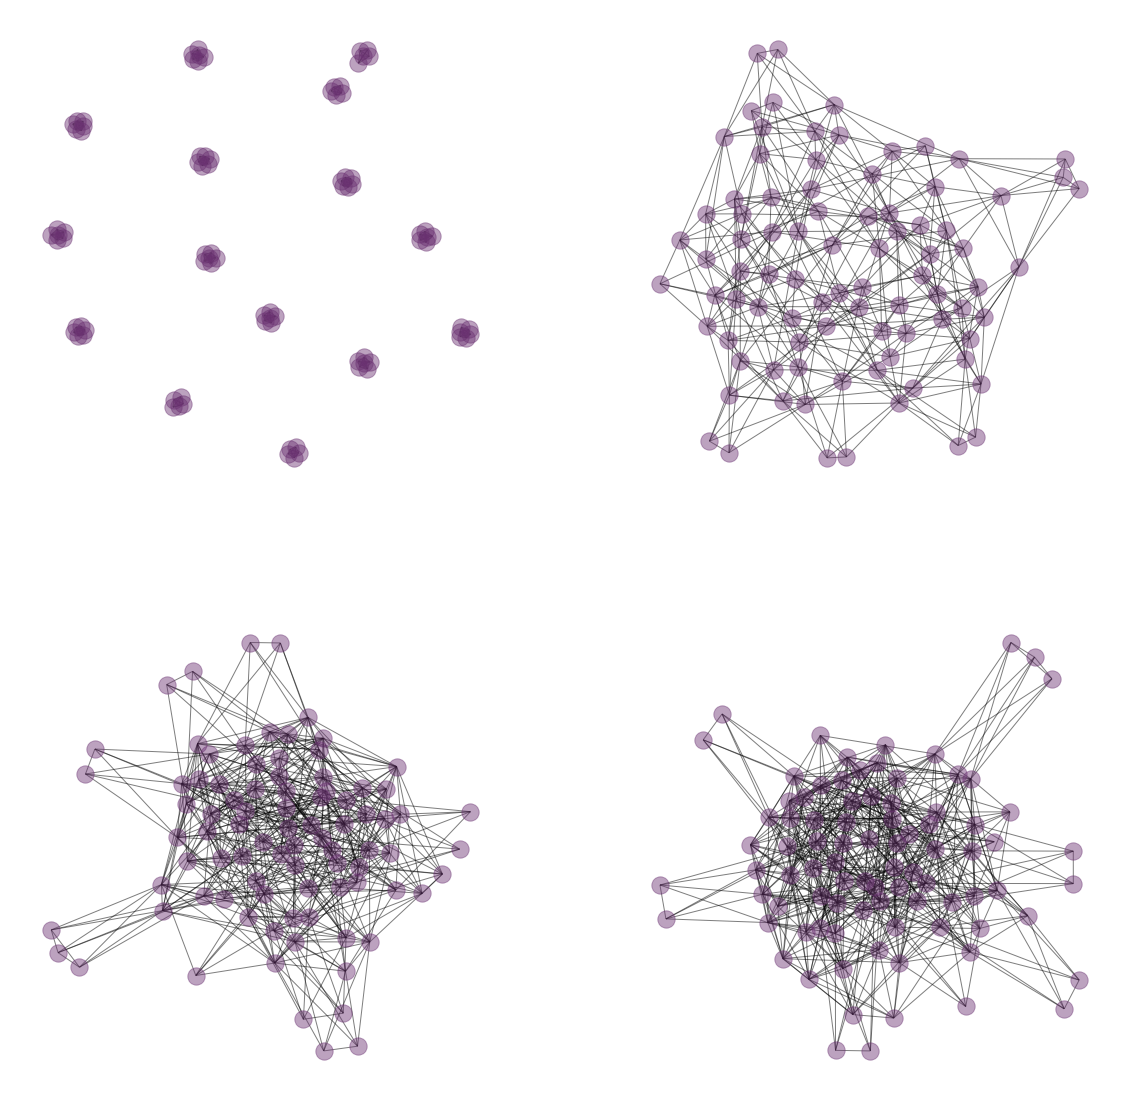

In [ ]:
term_list = [[1],[1,2],[1,2,3],[1,2,3,4]]
graph_dict = {}

fig = plt.figure(figsize=(20,20))
for i in range(4):
  ax=fig.add_subplot(2, 2, i+1)
  edges = []
  for t in term_list[i]:
    lts = list(msds2022_df[msds2022_df.Term==t][['FULL NAME', 'LT']].groupby('LT').groups.keys())
    for lt in lts: 
        lt_mems = msds2022_df[(msds2022_df.Term==t) & (msds2022_df.LT==lt)][['FULL NAME']]
        for p in combinations(list(lt_mems['FULL NAME']),2):
            edges.append([p[0], p[1]])
  
  G = nx.Graph()
  graph_dict["term_" + str(i+1)] = G
  G.add_edges_from(edges)
  pos = nx.fruchterman_reingold_layout(G);
  nx.draw_networkx_nodes(G, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45)
  nx.draw_networkx_edges(G, pos, alpha=0.500);
  plt.axis('off');

In [ ]:
graph_dict['term_1']

### Term 1

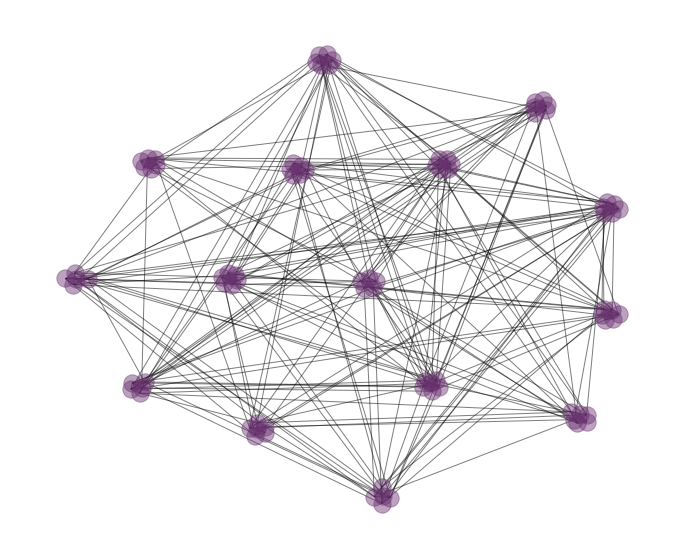

In [ ]:
pos = nx.fruchterman_reingold_layout(graph_dict['term_1']);
plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(msds2022_LTs, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(msds2022_LTs, pos, alpha=0.500);
# nx.draw_networkx_labels(msds2022_LTs, pos, font_color='black', 
#                         font_size=10);
plt.show();

Nodes:  86
Edges:  205
Average degree:  4.767441860465116
Minimum degree:  4
Maximum degree:  5
Average degree:  4.767441860465116


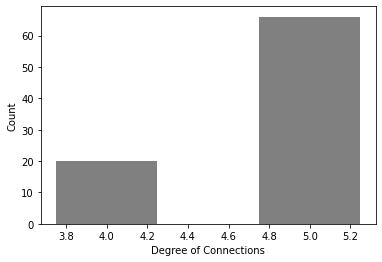

average_network_clustering:  1.0


In [ ]:
network_name = graph_dict['term_1']

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('average_network_clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

#print('average path length: ', average_shortest_path_length(network_name))
#print('network diameter: ', nx.diameter(network_name))

### Network Insights - Term 1 ###

During term 1, the MSDS network is not a connected network. It is comprised of 86 students, with a total of 205 links. The average number of friends that a student has is 4.76. The minimum degree is 4, while the maximum is 5. The network clustering is 1, implying that all the connections of each student in the network are also friends, because of they are part of the same learning team. Little interactions between learning teams is observed.

### Term 2

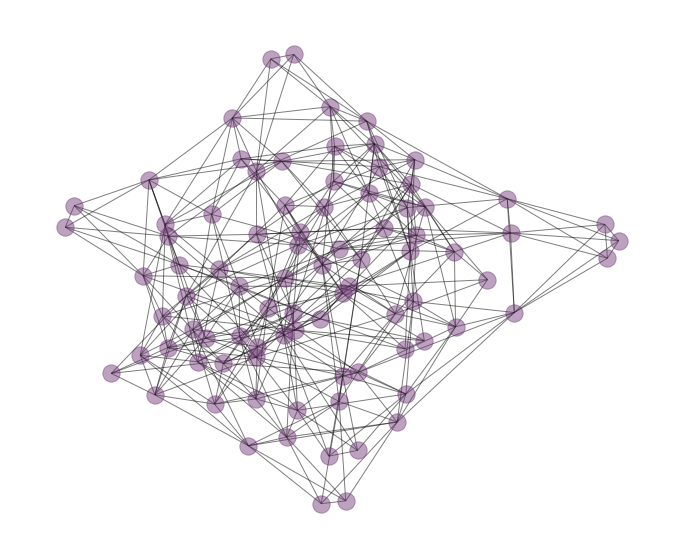

In [ ]:
pos = nx.fruchterman_reingold_layout(graph_dict['term_2']);
plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(msds2022_LTs, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(msds2022_LTs, pos, alpha=0.500);
# nx.draw_networkx_labels(msds2022_LTs, pos, font_color='black', 
#                         font_size=10);
plt.show();

Nodes:  86
Edges:  380
Average degree:  8.837209302325581
Minimum degree:  5
Maximum degree:  10
Average degree:  8.837209302325581


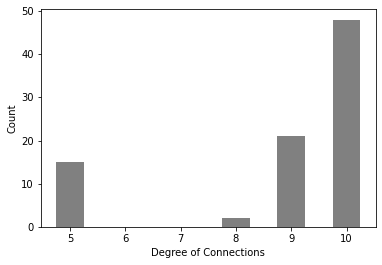

average_network_clustering:  0.5409745293466214
average path length:  2.451983584131327
network diameter:  5


In [ ]:
network_name = graph_dict['term_2']

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('average_network_clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('average path length: ', average_shortest_path_length(network_name))
print('network diameter: ', nx.diameter(network_name))

### Network Insights - Term 2

The number of connections in the network from 205 to 380, an 85% increase from the first term. Moreover, the network became connected in term 2. The average number of friends that each student has increased to 8.83. From the degree distribution, majority of students have 10 friends. Meanwhile there are about 15 students whose number of connections remained 5, which could either be because they have remained isolated with their learning temas or they may have lost some of their previous LT friends, while reaching out to others. 

The clustering coefficient is 0.54, which suggests that students are beginning to reach out to those outside of their LT's as not all of their friends are linked to each other. The shortest path length is 2.45 and the network diameter is 5. This means that it takes an average of 2, and a maximum of 5 students to link any pair of unrelated students in the network. It could be inferred that information flow within the network is efficient as it takes less than 5% of the student population to pass information to any student. 

### Term 3

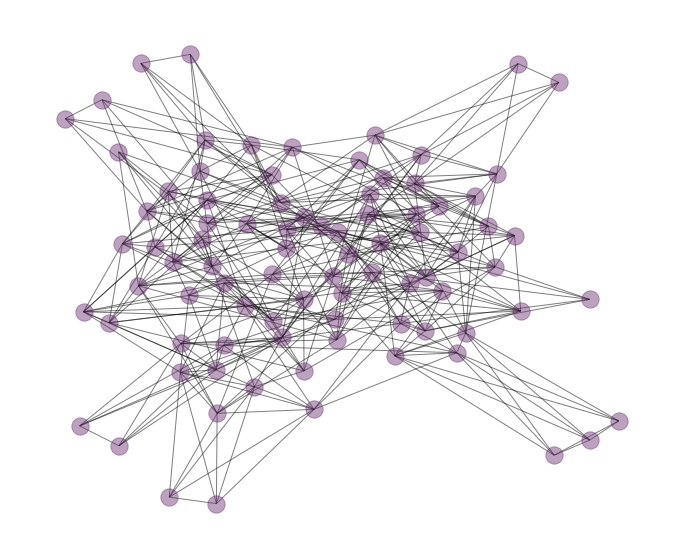

In [ ]:
pos = nx.fruchterman_reingold_layout(graph_dict['term_3']);
plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(msds2022_LTs, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(msds2022_LTs, pos, alpha=0.500);
# nx.draw_networkx_labels(msds2022_LTs, pos, font_color='black', 
#                         font_size=10);
plt.show();

Nodes:  87
Edges:  542
Average degree:  12.459770114942529
Minimum degree:  5
Maximum degree:  16
Average degree:  12.459770114942529


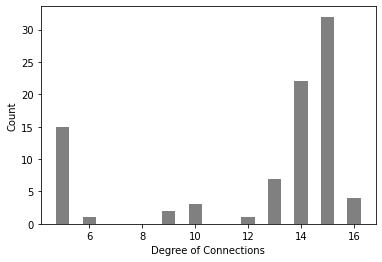

average_network_clustering:  0.4701251813320776
average path length:  2.082330927559476
network diameter:  4


In [ ]:
network_name = graph_dict['term_3']

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('average_network_clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('average path length: ', average_shortest_path_length(network_name))
print('network diameter: ', nx.diameter(network_name))

### Network Insights - Term 3

In term 3, the total number of links in the MSDS network is 542, a 42% increase from the previous term. The growth in the number of connections is lower than in term 2, which might be because by term 3, most students are already familiar with each other and may be establishing their respective friend groups. 

The average # of connections per student increased by 4, from 8.8 in term 2 to 12 in term 3. There were about 5 students with the highest number of connections, which is 16. These are central to the network in terms of degree centrality. Meanwhile, there are 15 students whose number of friends is 5, the lowest degree observed in the network. 

In terms of clustering, the clustering coefficient decreased from 0.54 to 0.47, suggesting that relationships are being created among students who may not necessarily be part of similar groups or interest. While the shortest path length remained relatively the same at 2.08, the network diameter decreased to 4, implying that the network became closer during the term. 

### Term 4

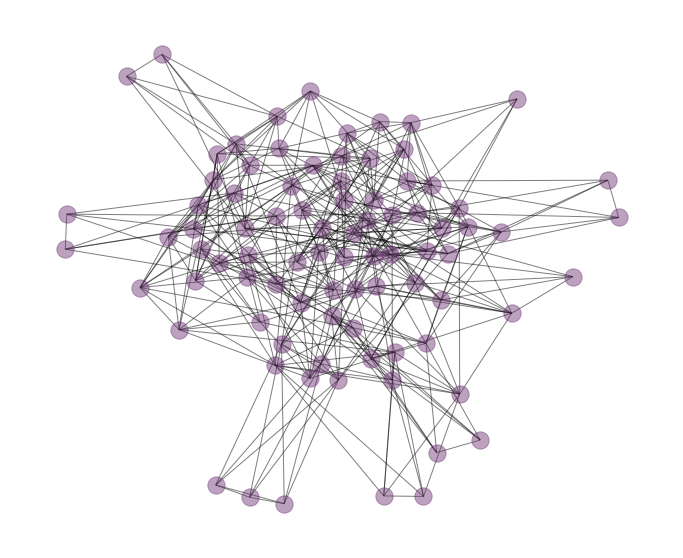

In [ ]:
pos = nx.fruchterman_reingold_layout(graph_dict['term_4']);
plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(msds2022_LTs, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(msds2022_LTs, pos, alpha=0.500);
# nx.draw_networkx_labels(msds2022_LTs, pos, font_color='black', 
#                         font_size=10);
plt.show();

Nodes:  87
Edges:  595
Average degree:  13.67816091954023
Minimum degree:  5
Maximum degree:  18
Average degree:  13.67816091954023


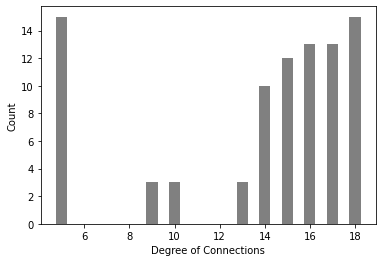

average_network_clustering:  0.4565464942239785
average path length:  2.0323442929697944
network diameter:  3


In [ ]:
network_name = graph_dict['term_4']

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_dict = dict(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('average_network_clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('average path length: ', average_shortest_path_length(network_name))
print('network diameter: ', nx.diameter(network_name))

### Network Insights - Term 4

### 5.b. Network Insights

The number of connections in term 4 grew by 10% in term 4, from 542 links in term 3 to 595 in term 4. This might be attributed to the student's tendency to regularly connect with their established friend groups, with little opportunity to build relationships externally. The average number of links per student increased to 13 from 12 in term 3. 

Compared to the degree distribution in term 3, where there were only 5 students who had 16 friends. In term 4, around 40% of students had at least 16 friends. meanwhile, there were still about 15 students whose number of connections remained at 5. These students could be introverts, who prefer small groups or they could also be the peripheral specialists of the MSDS network. 

The average network clustering and the average path length remained relatively the same as in term 3. Meanwhile the network diameter decreased from 4 to 3 in term 4, indicating the closeness in the network as the shortest distance between the two farthest students is 3. 